In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, plot_confusion_matrix,
                             roc_auc_score)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [2]:
X_train_base = pd.read_csv(r'../dataset/train.csv')
X_test_base = pd.read_csv(r'../dataset/test.csv')

y_train_base = X_train_base.match
X_train_base.drop('match', axis=1, inplace=True)

y_test_base = X_test_base.match
X_test_base.drop('match', axis=1, inplace=True)


X_train_smote = pd.read_csv(r'../dataset/train_smote.csv')
X_test_smote = pd.read_csv(r'../dataset/test_smote.csv')

y_train_smote = X_train_smote.match
X_train_smote.drop('match', axis=1, inplace=True)

y_test_smote = X_test_smote.match
X_test_smote.drop('match', axis=1, inplace=True)

X_train_poly = pd.read_csv(r'../dataset/train_poly.csv')
X_test_poly = pd.read_csv(r'../dataset/test_poly.csv')

y_train_poly = X_train_poly.match
X_train_poly.drop('match', axis=1, inplace=True)

y_test_poly = X_test_poly.match
X_test_poly.drop('match', axis=1, inplace=True)

# Base Dataset

In [3]:
sgd_base = SGDClassifier(
    loss = 'log',
    # verbose = 1,
    max_iter = 1000,
    tol = 1e-4,
    n_jobs = -1,
    random_state=42,
    early_stopping=True,
    validation_fraction = 0.2,
    n_iter_no_change = 100,
    class_weight='balanced'
)

sgd_base.fit(X_train_base, y_train_base)

SGDClassifier(class_weight='balanced', early_stopping=True, loss='log',
              n_iter_no_change=100, n_jobs=-1, random_state=42, tol=0.0001,
              validation_fraction=0.2)

In [4]:
randomForest_base = RandomForestClassifier(            
            bootstrap=True, class_weight=None,
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500,
            n_jobs=None, oob_score=False, random_state=42, verbose=0,
            warm_start=False)

randomForest_base.fit(X_train_base, y_train_base)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)

In [5]:
estimator = GradientBoostingClassifier(
    max_depth=8,
    max_features='sqrt',
    min_samples_leaf=0.3,
    min_samples_split=0.3, n_estimators=100
    )
gbc_base = EasyEnsembleClassifier(random_state=42,
                              n_jobs=-1,
                              base_estimator=estimator)
gbc_base.fit(X_train_base, y_train_base)

EasyEnsembleClassifier(base_estimator=GradientBoostingClassifier(max_depth=8,
                                                                 max_features='sqrt',
                                                                 min_samples_leaf=0.3,
                                                                 min_samples_split=0.3),
                       n_jobs=-1, random_state=42)

In [6]:
predict_sgd_base = sgd_base.predict(X_test_base)
predict_rf_base = randomForest_base.predict(X_test_base)
predict_gbc_base = gbc_base.predict(X_test_base)

print("Balanced Accuracy Score Base:")
print("SGD: {}".format(roc_auc_score(y_test_base, predict_sgd_base)))
print("RF: {}".format(roc_auc_score(y_test_base, predict_rf_base)))
print("GBC: {}".format(roc_auc_score(y_test_base, predict_gbc_base)))

Balanced Accuracy Score Base:
SGD: 0.8322391327847874
RF: 0.7202058178033531
GBC: 0.8383411391752706


# Polynomial Dataset

In [7]:
sgd_poly = SGDClassifier(
    loss = 'log',
    # verbose = 1,
    max_iter = 1000,
    tol = 1e-4,
    n_jobs = -1,
    random_state=42,
    early_stopping=True,
    validation_fraction = 0.2,
    n_iter_no_change = 100,
    class_weight='balanced'
)

sgd_poly.fit(X_train_poly, y_train_poly)

SGDClassifier(class_weight='balanced', early_stopping=True, loss='log',
              n_iter_no_change=100, n_jobs=-1, random_state=42, tol=0.0001,
              validation_fraction=0.2)

In [8]:
randomForest_poly = RandomForestClassifier(            
            bootstrap=True, class_weight=None,
            criterion='gini', max_depth=40, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700,
            n_jobs=None, oob_score=False, random_state=42, verbose=0,
            warm_start=False)

randomForest_poly.fit(X_train_poly, y_train_poly)

RandomForestClassifier(max_depth=40, n_estimators=700, random_state=42)

In [9]:
gbc_poly = EasyEnsembleClassifier(
    random_state=42,
    n_jobs=-1,
    base_estimator=GradientBoostingClassifier(
            max_depth=8,
            max_features='sqrt',
            min_samples_leaf=0.3,
            min_samples_split=0.3,
            n_estimators=100
                ))
gbc_poly.fit(X_train_poly, y_train_poly)

EasyEnsembleClassifier(base_estimator=GradientBoostingClassifier(max_depth=8,
                                                                 max_features='sqrt',
                                                                 min_samples_leaf=0.3,
                                                                 min_samples_split=0.3),
                       n_jobs=-1, random_state=42)

ROC-AUC Score Poly:
SGD: 0.8610566420047313
RF: 0.8938945997651964
GBC: 0.8677506856822507


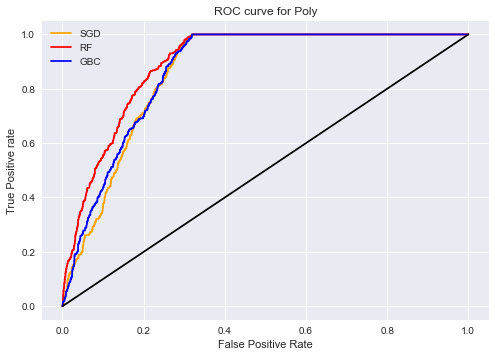

In [10]:
predict_prob_sgd_poly = sgd_poly.predict_proba(X_test_poly)[:,1]
predict_prob_rf_poly = randomForest_poly.predict_proba(X_test_poly)[:,1]
predict_prob_gbc_poly = gbc_poly.predict_proba(X_test_poly)[:,1]


fpr_sgd_poly, tpr_sgd_poly, threshold_sgd_poly = roc_curve(y_test_poly, predict_prob_sgd_poly, pos_label=1)
fpr_rf_poly, tpr_rf_poly, threshold_rf_poly = roc_curve(y_test_poly, predict_prob_rf_poly, pos_label=1)
fpr_gbc_poly, tpr_gbc_poly, threshold_gbc_poly = roc_curve(y_test_poly, predict_prob_gbc_poly, pos_label=1)

random_probs_sgd = [0 for i in range(len(y_test_poly))]

p_fpr_sgd, p_tpr_sgd, _ = roc_curve(y_test_poly, random_probs_sgd, pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr_sgd_poly, tpr_sgd_poly, color='orange', label='SGD')
plt.plot(fpr_rf_poly, tpr_rf_poly, color='red', label='RF')
plt.plot(fpr_gbc_poly, tpr_gbc_poly, color='blue', label ='GBC')
plt.plot(p_fpr_sgd, p_tpr_sgd, color='black')

plt.title('ROC curve for Poly')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='upper left')

print("ROC-AUC Score Poly:")
print("SGD: {}".format(roc_auc_score(y_test_poly, predict_prob_sgd_poly)))
print("RF: {}".format(roc_auc_score(y_test_poly, predict_prob_rf_poly)))
print("GBC: {}".format(roc_auc_score(y_test_poly, predict_prob_gbc_poly)))


In [11]:
predict_sgd_poly = sgd_poly.predict(X_test_poly)
predict_rf_poly = randomForest_poly.predict(X_test_poly)
predict_gbc_poly = gbc_poly.predict(X_test_poly)

print("Balanced Accuracy Score Poly:")
print("SGD: {}".format(balanced_accuracy_score(y_test_poly, predict_sgd_poly)))
print("RF: {}".format(balanced_accuracy_score(y_test_poly, predict_rf_poly)))
print("GBC: {}".format(balanced_accuracy_score(y_test_poly, predict_gbc_poly)))

Balanced Accuracy Score Poly:
SGD: 0.8322391327847876
RF: 0.7209248100075669
GBC: 0.8383411391752706


# Smote Dataset

In [12]:
sgd_smote = SGDClassifier(
    loss = 'log',
    # verbose = 1,
    max_iter = 1000,
    tol = 1e-4,
    n_jobs = -1,
    random_state=42,
    early_stopping=True,
    validation_fraction = 0.2,
    n_iter_no_change = 100,
    class_weight='balanced'
)

sgd_smote.fit(X_train_smote, y_train_smote)

SGDClassifier(class_weight='balanced', early_stopping=True, loss='log',
              n_iter_no_change=100, n_jobs=-1, random_state=42, tol=0.0001,
              validation_fraction=0.2)

In [13]:
randomForest_smote = RandomForestClassifier(            
            bootstrap=True, class_weight=None,
            criterion='gini', max_depth=30, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1100,
            n_jobs=None, oob_score=False, random_state=42, verbose=0,
            warm_start=False)

randomForest_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=30, n_estimators=1100, random_state=42)

In [14]:
gbc_smote = GradientBoostingClassifier(
    max_features='sqrt',
    min_samples_leaf=0.3,
    min_samples_split=0.2,
    n_estimators=100
    )
gbc_smote.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=0.3,
                           min_samples_split=0.2)

ROC-AUC Score Smote:
SGD: 0.8614337358181302
RF: 0.8903203789038637
GBC: 0.8693269378222581


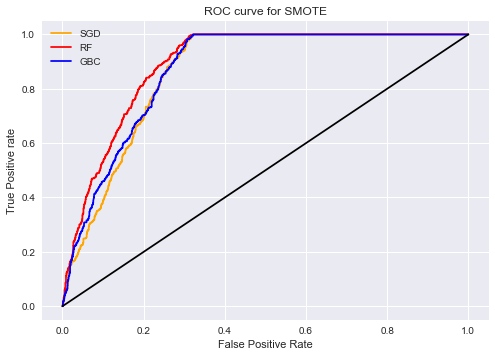

In [15]:
predict_prob_sgd_smote = sgd_smote.predict_proba(X_test_smote)[:,1]
predict_prob_rf_smote = randomForest_smote.predict_proba(X_test_smote)[:,1]
predict_prob_gbc_smote = gbc_smote.predict_proba(X_test_smote)[:,1]


fpr_sgd, tpr_sgd, threshold_sgd = roc_curve(y_test_smote, predict_prob_sgd_smote, pos_label=1)
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test_smote, predict_prob_rf_smote, pos_label=1)
fpr_gbc, tpr_gbc, threshold_gbc = roc_curve(y_test_smote, predict_prob_gbc_smote, pos_label=1)

random_probs_sgd = [0 for i in range(len(y_test_smote))]
random_probs_rf = [0 for i in range(len(y_test_smote))]
random_probs_gbc = [0 for i in range(len(y_test_smote))]


p_fpr_sgd, p_tpr_sgd, _ = roc_curve(y_test_smote, random_probs_sgd, pos_label=1)
p_fpr_rf, p_tpr_rf, _ = roc_curve(y_test_smote, random_probs_rf, pos_label=1)
p_fpr_gbc, p_tpr_gbc, _ = roc_curve(y_test_smote, random_probs_gbc, pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr_sgd, tpr_sgd, color='orange', label='SGD')
plt.plot(fpr_rf, tpr_rf, color='red', label='RF')
plt.plot(fpr_gbc, tpr_gbc, color='blue', label ='GBC')
plt.plot(p_fpr_sgd, p_tpr_sgd, color='black')

plt.title('ROC curve for SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='upper left')

print("ROC-AUC Score Smote:")
print("SGD: {}".format(roc_auc_score(y_test_smote, predict_prob_sgd_smote)))
print("RF: {}".format(roc_auc_score(y_test_smote, predict_prob_rf_smote)))
print("GBC: {}".format(roc_auc_score(y_test_smote, predict_prob_gbc_smote)))

In [16]:
predict_sgd_smote = sgd_smote.predict(X_test_smote)
predict_rf_smote = randomForest_smote.predict(X_test_smote)
predict_gbc_smote = gbc_smote.predict(X_test_smote)

print("Balanced Accuracy Score Smote:")
print("SGD: {}".format(balanced_accuracy_score(y_test_smote, predict_sgd_smote)))
print("RF: {}".format(balanced_accuracy_score(y_test_smote, predict_rf_smote)))
print("GBC: {}".format(balanced_accuracy_score(y_test_smote, predict_gbc_smote)))

Balanced Accuracy Score Smote:
SGD: 0.8155068517945894
RF: 0.7423405961601794
GBC: 0.8260591936728686
